In [1]:
import numpy as np
import pandas as pd
# from skimage import imread
from matplotlib.image import imread
import plotly.express as px
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,callbacks,metrics,backend
from tensorflow.keras.optimizers import RMSprop
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# sys.path.append(os.path.abspath(r'C:\Users\raulg\Documents\THEBRIDGE_DS\0.-Repo_Git\ml_alzheimer_class\src'))
sys.path.append(os.path.relpath('../src'))
import utils as ut
import math


In [ ]:
img_model_4 = models.load_model("../models/image/model_4.keras")
img_model_baseline = models.load_model("../models/image/baseline_model_b.keras")
img_model_2 = models.load_model("../models/image/model_2.keras")
img_url = 'C:/Users/raulg/Downloads/rect_image.jpg'


In [ ]:
x1_train,x1_test,x1_val,y1_train,y1_test,y1_val,scal = ut.img_images_load('../data/images/processed_train/x1_64.pkl','../data/images/processed_train/y1_64.pkl',
                                                                     '../data/images/processed_val/x2_64.pkl','../data/images/processed_val/y2_64.pkl',
                                                                     val_set = True,reshuffle=True,img_size=64)

### Pruebas encuadrado imagen

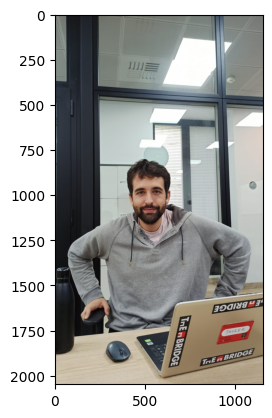

In [28]:
img_test = imread('C:/Users/raulg/Downloads/rect_image_2.jpg')
plt.imshow(img_test)

In [29]:

def recortar_centro_relativo(imagen, porcentaje_ancho=1, porcentaje_alto=0.5):
    alto, ancho, _ = imagen.shape  # Dimensiones de la imagen
    
    # Calcular dimensiones del recorte
    ancho_corte = int(ancho * porcentaje_ancho)
    alto_corte = int(alto * porcentaje_alto)
    
    # Coordenadas centrales
    centro_x, centro_y = ancho // 2, alto // 2
    
    # Coordenadas del recorte
    x_inicio = max(centro_x - ancho_corte // 2, 0)
    x_fin = min(centro_x + ancho_corte // 2, ancho)
    y_inicio = max(centro_y - alto_corte // 2, 0)
    y_fin = min(centro_y + alto_corte // 2, alto)
    
    # Recortar la imagen
    recorte = imagen[y_inicio:y_fin, x_inicio:x_fin]
    return recorte
img_test = recortar_centro_relativo(img_test,1,0.5)

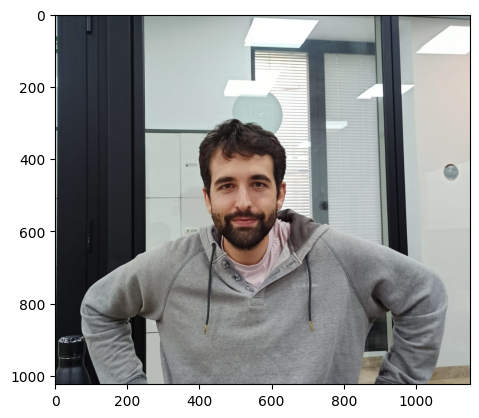

In [30]:
# img_test = imread('C:/Users/raulg/Downloads/rect_image.jpg')
plt.imshow(img_test)

In [ ]:
img_test = plt.imread('C:/Users/raulg/Downloads/vector-mail-icon-1027844665.jpg')
# img_test = cv2.imdecode(img_url,cv2.IMREAD_COLOR)

img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY) ### Conversion to gray scale
img_test = cv2.resize(img_test, (32, 32))
img_test = img_test.reshape(-1,1)
img_test = scal.transform(img_test)
img_test = img_test.reshape(-1, 32, 32, 1)


In [22]:
img_test

array([[[[-1.1804688 ],
         [-0.94521157],
         [-0.44528996],
         ...,
         [-0.44528996],
         [-1.07754376],
         [-1.07754376]],

        [[-0.57762215],
         [-0.34236492],
         [-0.165922  ],
         ...,
         [-0.40117923],
         [-0.40117923],
         [-1.07754376]],

        [[ 0.34870319],
         [ 0.68688546],
         [-0.34236492],
         ...,
         [-0.32766134],
         [-0.28355061],
         [-0.90110084]],

        ...,

        [[ 0.48103538],
         [ 0.4075175 ],
         [-0.04829338],
         ...,
         [-0.66584361],
         [-0.82758296],
         [-0.95991515]],

        [[ 0.67218188],
         [ 0.73099619],
         [ 0.48103538],
         ...,
         [-0.68054719],
         [-0.85699011],
         [-0.81287938]],

        [[ 0.78981049],
         [ 0.80451407],
         [ 0.90743911],
         ...,
         [-0.88639726],
         [-0.94521157],
         [-0.63643646]]]])

In [43]:
img_test_64 = cv2.imread('C:/Users/raulg/Downloads/vector-mail-icon-1027844665.jpg')
# img_test = cv2.imdecode(img_url,cv2.IMREAD_COLOR)

img_test_64 = cv2.cvtColor(img_test_64, cv2.COLOR_BGR2GRAY) ### Conversion to gray scale
img_test_64 = cv2.resize(img_test_64, (64, 64))
img_test_64 = img_test_64.reshape(-1,1)
img_test_64 = scal.transform(img_test_64)
img_test_64 = img_test_64.reshape(-1, 64, 64, 1)

In [47]:
pickle.dump(scal,open("../models/image/aux_scal.pkl", "wb"))

In [46]:
# img_test = img_test.reshape(-1, 64, 64, 1)
print(img_model_2.predict(img_test).round(4))
print(img_model_4.predict(img_test_64).round(4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.000e+00 6.000e-04 9.994e-01 0.000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0. 1. 0. 0.]]
